In [314]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4 as bs
import requests

In [481]:
nasdaq100 = []
remove = ['GEHC','CEG','GFS','CRWD','ABNB','ZM','LCID','DDOG','MRNA']

def getNasdaq100():
    resp = requests.get('https://en.wikipedia.org/wiki/Nasdaq-100')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable', 'id': 'constituents'})
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text
        nasdaq100.append(ticker)
    
    nasdaq100.extend(('SPY','QQQ'))
    return [x for x in nasdaq100 if x not in remove]

nasdaq100 = getNasdaq100()

In [ ]:
def get_data(tickers, start_date, end_date):
    date_range = pd.date_range(start_date, end_date)
    prices = pd.DataFrame(index=date_range)

    for ticker in tickers:
        try:
            data = yf.download(ticker,start_date,end_date)
            print('fetched data for {0} from {1} to {2}'.format(ticker, data.index.min(), data.index.max()))
            data = data.rename(columns = {'Adj Close': ticker})[ticker]
            prices = prices.join(data)
            prices = prices.dropna()
            tickers_got.append(ticker)
         
        except Exception as e:
        # Handle any other exceptions
            print(f"An error occurred for {ticker}: {str(e)}")
            tickers_delete.append(ticker)
    
    # display(prices)    
    return prices


In [75]:
def get_daily_returns(data):
    data = (data/data.shift(1)) -1
    data.iloc[0,:]= 0
    return data

In [76]:
daily_returns_df = get_daily_returns(data)
daily_returns_df

,SPY,AAPL,TSLA,WMT,AXP
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.023863,-0.099607,-0.031472,-0.005143,-0.019519
2019-01-04,0.033496,0.042689,0.057697,0.006246,0.045060
2019-01-07,0.007885,-0.002226,0.054361,0.011772,0.005428
2019-01-08,0.009395,0.019063,0.001164,0.006981,0.004890
...,...,...,...,...,...
2022-12-23,0.005752,-0.002798,-0.017551,0.002021,0.011768
2022-12-27,-0.003943,-0.013878,-0.114089,0.000278,-0.004285
2022-12-28,-0.012428,-0.030685,0.033089,-0.017523,-0.016258
2022-12-29,0.018000,0.028324,0.080827,0.006087,0.022985


array([[<AxesSubplot:title={'center':'SPY'}>,
        <AxesSubplot:title={'center':'AAPL'}>],
       [<AxesSubplot:title={'center':'TSLA'}>,
        <AxesSubplot:title={'center':'WMT'}>],
       [<AxesSubplot:title={'center':'AXP'}>, <AxesSubplot:>]],
      dtype=object)

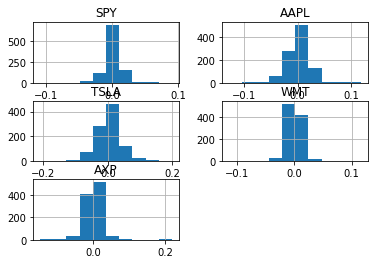

In [77]:
daily_returns_df.hist()

spy_kurtosis : 10.61809870529422 
spy_mean : 0.0005883687513377702 
spy_std : 0.014190837985011721


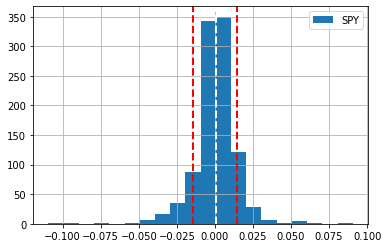

In [78]:
daily_returns_df['SPY'].hist(bins=20, label='SPY')
spy_std = daily_returns_df['SPY'].std()
spy_mean = daily_returns_df['SPY'].mean()
spy_kurtosis = daily_returns_df['SPY'].kurtosis()

#kurtosis - defines how flat tails are at the end of gaussian, +ve is good
print('spy_kurtosis : {} \nspy_mean : {} \nspy_std : {}'.format(spy_kurtosis, spy_mean, spy_std))

plt.axvline(spy_mean,color='w',linewidth=2,linestyle='dashed')
plt.axvline(spy_std,color='r',linewidth=2,linestyle='dashed')
plt.axvline(-spy_std,color='r',linewidth=2,linestyle='dashed')

plt.legend(loc='upper right')

## Alpha, Beta
* Alpha (y-intercept of the line) - +ve means stock is performing better than market, negative means it is underperforming
* Beta (slope of the line) - How is stock (y-axis) reacting wrt to spy/market (x-axis). If beta is 1 it means if market goes up by 1% then stock also goes up by 1%

Alpha for tesla` 0.0007217754279239255, Beta for tesla 1.2453921681808817


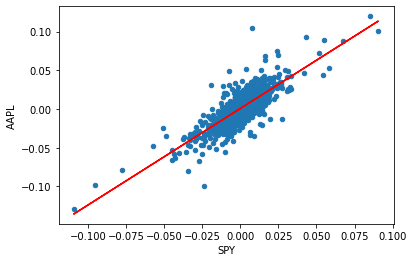

In [80]:
daily_returns_df.plot(kind='scatter', x='SPY',y='TSLA')
beta_tsla, alpha_tsla = np.polyfit(daily_returns_df['SPY'],daily_returns_df['TSLA'],1)

print('Alpha for tesla` {}, Beta for tesla {}'.format(alpha_tsla, beta_tsla))

plt.plot(daily_returns_df['SPY'], beta_tsla*daily_returns_df['SPY'] + alpha_tsla,'-',color='r')

## Portfolio optimization
* Get data
* check what will be the portfolio value if you distributed amounts based on intuition/knowledge
* Run optimizer to get optimal allocs 

In [527]:
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

tickers_got = []
tickers_delete = []

start_date = str((dt.now() - relativedelta(years=2)).strftime('%Y-%m-%d')) 
end_date = str(dt.now().strftime('%Y-%m-%d'))

print('start and end dates are {0} and {1}'.format(start_date, end_date))

data = get_data(nasdaq100, start_date, end_date)

start and end dates are 2021-07-16 and 2023-07-16
[*********************100%***********************]  1 of 1 completed
fetched data for ATVI from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for ADBE from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for ADP from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for ALGN from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for GOOGL from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for GOOG from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for AMZN from 2021-07-16 00:00:00 

[*********************100%***********************]  1 of 1 completed
fetched data for MU from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for MSFT from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for MDLZ from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for MNST from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for NFLX from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for NVDA from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***********************]  1 of 1 completed
fetched data for NXPI from 2021-07-16 00:00:00 to 2023-07-14 00:00:00
[*********************100%***

In [519]:
data.columns

Index(['ATVI', 'ADBE', 'ADP', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP',
       'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK',
       'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CTAS', 'CSCO', 'CTSH',
       'CMCSA', 'CPRT', 'CSGP', 'COST', 'CSX', 'DXCM', 'FANG', 'DLTR', 'EBAY',
       'EA', 'ENPH', 'EXC', 'FAST', 'FTNT', 'GILD', 'HON', 'IDXX', 'ILMN',
       'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LULU',
       'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MDLZ', 'MNST',
       'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX',
       'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SBUX',
       'SNPS', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY',
       'XEL', 'ZS', 'SPY', 'QQQ'],
      dtype='object')

In [518]:
data.loc['2023-07-14', (data < 50).any()]

ATVI      90.070000
GOOGL    125.419998
GOOG     125.699997
AMD      115.940002
AAPL     190.690002
AMAT     142.740005
AZN       67.379997
BKR       34.349998
CDNS     240.740005
CSCO      50.380001
CTSH      68.599998
CMCSA     42.009998
CPRT      93.639999
CSGP      89.290001
CSX       33.630001
DXCM     137.320007
FANG     135.660004
EBAY      46.500000
ENPH     177.940002
EXC       42.020000
FAST      57.480000
FTNT      78.919998
INTC      33.150002
JD        38.139999
KDP       31.660000
KHC       35.849998
MRVL      63.450001
MCHP      89.720001
MU        64.080002
MDLZ      72.279999
MNST      57.310001
NVDA     454.690002
ON        99.680000
PCAR      85.660004
PANW     241.259995
PAYX     120.860001
PDD       79.489998
QCOM     122.559998
SIRI       4.750000
SBUX     101.610001
TSLA     281.380005
WBA       29.200001
WBD       12.400000
XEL       64.269997
ZS       145.429993
Name: 2023-07-14 00:00:00, dtype: float64

In [528]:
def portfolio_value_check(data, amt, allocs):
    
    # divide by first row to get cumulative returns based on day 1
    normalized_data = data/data.iloc[0,:]
    
    # get portfolio value based on amount and allocations compared to day 1
    position_values = normalized_data.drop('SPY',axis=1) * allocs * amt 
    position_values['PF_VAL'] = position_values.sum(axis=1)
    
    # display(position_values)

    # cumulative return
    cum_ret = (position_values['PF_VAL'][-1]/position_values['PF_VAL'][0]) - 1
    print('cumulative return of the portfolio is {}'.format(cum_ret))
    
    # Avg & stds of individual daily returns of all stocks in porfolio
    daily_returns_all = get_daily_returns(position_values)
    # display(daily_returns_all)
    avg_daily_rets_all = daily_returns_all.mean(axis=0).values
    daily_rets_all_std = daily_returns_all.std(axis=0).values
    
    # Avg & std of porfolio daily returns
    avg_daily_rets_pf = avg_daily_rets_all[-1]
    std_daily_rets_pf = daily_rets_all_std[-1]
    
    print('Avg return of the portfolio is {0} \nstd of the portfolio is {1}'.format(avg_daily_rets_pf,std_daily_rets_pf))

    sharpe_ratio = (252 ** (0.5)) * ((avg_daily_rets_pf - 0) / std_daily_rets_pf)
    
    print('sharpe_ratio of the portfolio is {}'.format(sharpe_ratio))
    print('portfolio amount would be {0}'.format(position_values['PF_VAL'][-1]))
    ax = normalized_data['SPY'].plot(title = 'Daily Portfolio Value and SPY', label = 'SPY')
    data_normed = position_values['PF_VAL']/position_values['PF_VAL'].iloc[0]
    data_normed.plot(label='Portfolio Value', ax = ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc = 2)
    plt.show()
    
    return avg_daily_rets_all[:-1], daily_rets_all_std[:-1]


cumulative return of the portfolio is 0.13331160509553475
Avg return of the portfolio is 0.0003531519459982045 
std of the portfolio is 0.014419509846314413
sharpe_ratio of the portfolio is 0.3887866789183179
portfolio amount would be 22666.232101910744


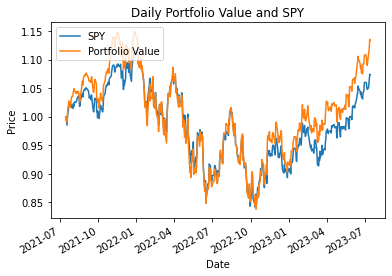

In [529]:
allocs = np.ones((len(tickers_got)-1)) / (len(tickers_got)-1)
amount = 20000
returns, stds = portfolio_value_check(data, amount, allocs)

cumulative return of the portfolio is 1.8358462582650823
Avg return of the portfolio is 0.002640685435185734 
std of the portfolio is 0.03370222073408765
sharpe_ratio of the portfolio is 1.2438225375193739
portfolio amount would be 56716.92516530201


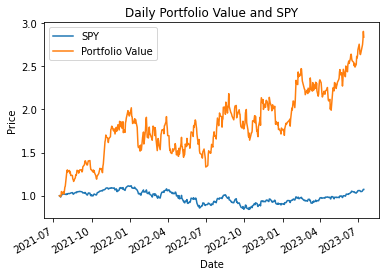

In [532]:
returns, stds = portfolio_value_check(data, amount, optimal_allocs)

In [530]:
def portfolio_optimizer_1(returns, stds):
    # Define the risk-free rate
    risk_free_rate = 0.0

# Define the objective function
    def objective(weights):
        # print(returns - risk_free_rate)  weights / stds
        return - ((returns - risk_free_rate) / stds) @ weights

    # Define the constraints
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'ineq', 'fun': lambda weights: weights})

    # Define the bounds
    bounds = [(0, None)] * len(returns)

    # Define the initial guess
    allocs = np.ones(len(returns)) / len(returns)
    
    # portfolio_value_check(100000,allocs)

    # Solve the optimization problem
    result = minimize(objective, allocs, method='SLSQP', bounds=bounds, constraints=constraints)

    # Retrieve the optimal weights
    optimal_weights = result.x

    # Print the optimal weights
    # print("Optimal allocs:", optimal_weights)
    return np.array(optimal_weights)
    

In [531]:
optimal_allocs = portfolio_optimizer_1(returns, stds)

In [533]:
dist = {}
for stock, alloc in zip(nasdaq100,optimal_allocs):
    dist[stock] = round(alloc*amount)
    
sorted(dist.items(), key=lambda x: x[1], reverse=True)

[('ON', 20000),
 ('ATVI', 0),
 ('ADBE', 0),
 ('ADP', 0),
 ('ALGN', 0),
 ('GOOGL', 0),
 ('GOOG', 0),
 ('AMZN', 0),
 ('AMD', 0),
 ('AEP', 0),
 ('AMGN', 0),
 ('ADI', 0),
 ('ANSS', 0),
 ('AAPL', 0),
 ('AMAT', 0),
 ('ASML', 0),
 ('AZN', 0),
 ('TEAM', 0),
 ('ADSK', 0),
 ('BKR', 0),
 ('BIIB', 0),
 ('BKNG', 0),
 ('AVGO', 0),
 ('CDNS', 0),
 ('CHTR', 0),
 ('CTAS', 0),
 ('CSCO', 0),
 ('CTSH', 0),
 ('CMCSA', 0),
 ('CPRT', 0),
 ('CSGP', 0),
 ('COST', 0),
 ('CSX', 0),
 ('DXCM', 0),
 ('FANG', 0),
 ('DLTR', 0),
 ('EBAY', 0),
 ('EA', 0),
 ('ENPH', 0),
 ('EXC', 0),
 ('FAST', 0),
 ('FTNT', 0),
 ('GILD', 0),
 ('HON', 0),
 ('IDXX', 0),
 ('ILMN', 0),
 ('INTC', 0),
 ('INTU', 0),
 ('ISRG', 0),
 ('JD', 0),
 ('KDP', 0),
 ('KLAC', 0),
 ('KHC', 0),
 ('LRCX', 0),
 ('LULU', 0),
 ('MAR', 0),
 ('MRVL', 0),
 ('MELI', 0),
 ('META', 0),
 ('MCHP', 0),
 ('MU', 0),
 ('MSFT', 0),
 ('MDLZ', 0),
 ('MNST', 0),
 ('NFLX', 0),
 ('NVDA', 0),
 ('NXPI', 0),
 ('ORLY', 0),
 ('ODFL', 0),
 ('PCAR', 0),
 ('PANW', 0),
 ('PAYX', 0),
 ('PYP

[('ORLY', 20000),
 ('ATVI', 0),
 ('ADBE', 0),
 ('ADP', 0),
 ('ABNB', 0),
 ('ALGN', 0),
 ('GOOGL', 0),
 ('GOOG', 0),
 ('AMZN', 0),
 ('AMD', 0),
 ('AEP', 0),
 ('AMGN', 0),
 ('ADI', 0),
 ('ANSS', 0),
 ('AAPL', 0),
 ('AMAT', 0),
 ('ASML', 0),
 ('AZN', 0),
 ('TEAM', 0),
 ('ADSK', 0),
 ('BKR', 0),
 ('BIIB', 0),
 ('BKNG', 0),
 ('AVGO', 0),
 ('CDNS', 0),
 ('CHTR', 0),
 ('CTAS', 0),
 ('CSCO', 0),
 ('CTSH', 0),
 ('CMCSA', 0),
 ('CPRT', 0),
 ('CSGP', 0),
 ('COST', 0),
 ('CRWD', 0),
 ('CSX', 0),
 ('DDOG', 0),
 ('DXCM', 0),
 ('FANG', 0),
 ('DLTR', 0),
 ('EBAY', 0),
 ('EA', 0),
 ('ENPH', 0),
 ('EXC', 0),
 ('FAST', 0),
 ('FTNT', 0),
 ('GILD', 0),
 ('HON', 0),
 ('IDXX', 0),
 ('ILMN', 0),
 ('INTC', 0),
 ('INTU', 0),
 ('ISRG', 0),
 ('JD', 0),
 ('KDP', 0),
 ('KLAC', 0),
 ('KHC', 0),
 ('LRCX', 0),
 ('LCID', 0),
 ('LULU', 0),
 ('MAR', 0),
 ('MRVL', 0),
 ('MELI', 0),
 ('META', 0),
 ('MCHP', 0),
 ('MU', 0),
 ('MSFT', 0),
 ('MRNA', 0),
 ('MDLZ', 0),
 ('MNST', 0),
 ('NFLX', 0),
 ('NVDA', 0),
 ('NXPI', 0),
 ('O

In [408]:
dist

{'ATVI': 0.0,
 'ADBE': 0.0,
 'ADP': 0.0,
 'ABNB': 0.0,
 'ALGN': 0.0,
 'GOOGL': 0.0,
 'GOOG': 0.0,
 'AMZN': 0.0,
 'AMD': 0.0,
 'AEP': 0.0,
 'AMGN': 0.0,
 'ADI': 0.0,
 'ANSS': 0.0,
 'AAPL': 0.0,
 'AMAT': 0.0,
 'ASML': 0.0,
 'AZN': 0.0,
 'TEAM': 0.0,
 'ADSK': 0.0,
 'BKR': 0.0,
 'BIIB': 0.0,
 'BKNG': 0.0,
 'AVGO': 0.0,
 'CDNS': 0.0,
 'CHTR': 0.0,
 'CTAS': 0.0,
 'CSCO': 0.0,
 'CTSH': 0.0,
 'CMCSA': 0.0,
 'CPRT': 0.0,
 'CSGP': 0.0,
 'COST': 0.0,
 'CRWD': 0.0,
 'CSX': 0.0,
 'DDOG': 0.0,
 'DXCM': 0.0,
 'FANG': 0.0,
 'DLTR': 0.0,
 'EBAY': 0.0,
 'EA': 0.0,
 'ENPH': 0.0,
 'EXC': 0.0,
 'FAST': 0.0,
 'FTNT': 0.0,
 'GILD': 0.0,
 'HON': 0.0,
 'IDXX': 0.0,
 'ILMN': 0.0,
 'INTC': 0.0,
 'INTU': 0.0,
 'ISRG': 0.0,
 'JD': 0.0,
 'KDP': 0.0,
 'KLAC': 0.0,
 'KHC': 0.0,
 'LRCX': 0.0,
 'LCID': 0.0,
 'LULU': 0.0,
 'MAR': 0.0,
 'MRVL': 0.0,
 'MELI': 0.0,
 'META': 0.0,
 'MCHP': 0.0,
 'MU': 0.0,
 'MSFT': 0.0,
 'MRNA': 0.0,
 'MDLZ': 0.0,
 'MNST': 0.0,
 'NFLX': 0.0,
 'NVDA': 0.0,
 'NXPI': 0.0,
 'ORLY': 20000.0,
 'OD

In [271]:
np.nonzero(optimal_allocs)

(array([ 1,  2,  4,  5,  6, 10, 12, 14, 16, 20, 26, 27, 30, 33, 34, 35, 37,
        39, 42, 44, 45, 49, 50, 51, 52, 54, 55, 57, 58, 61, 62, 65, 67, 69,
        74, 77, 79, 81, 86, 87, 88, 89, 90, 91, 95, 97, 98, 99]),)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
cumulative return of the portfolio is 4.588671559073078
Avg return of the portfolio is 0.001841142296887922 
std of the portfolio is 0.025722784341978406
sharpe_ratio of the portfolio is 1.1362388879258554


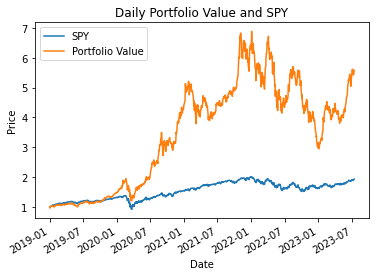

In [199]:
portfolio_optimizer(amt, [0.25,0.25,0.25,0.25], tickers, '2019-01-01','2023-07-15') 

In [172]:
position_values = normalized_data.drop('SPY',axis=1) * allocs * amt 
position_values['PF_VAL'] = position_values.sum(axis=1)
daily_returns_all = get_daily_returns(position_values)
avg_daily_rets_all = all_daily_returns.mean(axis=0).values
daily_rets_all_std = all_daily_returns.std(axis=0).values

In [177]:
daily_rets_all_std

array([0.014190838 , 0.0217678634, 0.0422507562, 0.0147346125,
       0.0253016041, 0.0245315852])

## calculating portfolio returns

In [104]:
amt = 10000
allocs = [0.2,0.2,0.2,0.2,0.2]

# divide by first row to get cumulative returns based on day 1
normalized_data = data/data.iloc[0,:]

display(normalized_data)

,SPY,AAPL,TSLA,WMT,AXP
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.976137,0.900393,0.968528,0.994857,0.980481
2019-01-04,1.008834,0.938830,1.024410,1.001071,1.024662
2019-01-07,1.016788,0.936740,1.080098,1.012856,1.030223
2019-01-08,1.026341,0.954598,1.081356,1.019927,1.035261
...,...,...,...,...,...
2022-12-23,1.635937,3.460426,5.956565,1.648633,1.626270
2022-12-27,1.629485,3.412401,5.276989,1.649091,1.619301
2022-12-28,1.609234,3.307691,5.451599,1.620194,1.592974
2022-12-29,1.638201,3.401379,5.892235,1.630056,1.629588


In [105]:
position_values = normalized_data * allocs * amt 
position_values['PF_VAL'] = position_values.sum(axis=1)

display(position_values)

,SPY,AAPL,TSLA,WMT,AXP,PF_VAL
2019-01-02,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000
2019-01-03,1952.274180,1800.785881,1937.056575,1989.714718,1960.961263,9640.792617
2019-01-04,2017.667341,1877.660171,2048.819685,2002.142591,2049.323086,9995.612874
2019-01-07,2033.575685,1873.480062,2160.196061,2025.712322,2060.446867,10153.410997
2019-01-08,2052.681882,1909.195025,2162.711126,2039.854056,2070.521572,10234.963661
...,...,...,...,...,...,...
2022-12-23,3271.873415,6920.852725,11913.130150,3297.265186,3252.539125,28655.660600
2022-12-27,3258.970866,6824.802383,10553.978604,3298.182255,3238.601605,27174.535712
2022-12-28,3218.468492,6615.382067,10903.198308,3240.387508,3185.948259,27163.384633
2022-12-29,3276.402141,6802.758266,11784.470104,3260.111193,3259.175763,28382.917466


In [127]:




port_daily_returns = get_daily_returns(portfolio_value.to_frame('pf_val'))[1:]
# display(port_daily_returns)
avg_daily_rets = port_daily_returns.mean(axis = 0)
avg_daily_ret = avg_daily_rets.values[0]

# Standard Deviation of return
ret_std = portfolio_value.std()

print('cumulative return {}\navg_daily_ret {}\nstd {} '.format(cum_ret, avg_daily_ret, ret_std))

,SPY,AAPL,TSLA,WMT,AXP,PF_VAL
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.023863,-0.099607,-0.031472,-0.005143,-0.019519,-0.035921
2019-01-04,0.033496,0.042689,0.057697,0.006246,0.045060,0.036804
2019-01-07,0.007885,-0.002226,0.054361,0.011772,0.005428,0.015787
2019-01-08,0.009395,0.019063,0.001164,0.006981,0.004890,0.008032
...,...,...,...,...,...,...
2022-12-23,0.005752,-0.002798,-0.017551,0.002021,0.011768,-0.005865
2022-12-27,-0.003943,-0.013878,-0.114089,0.000278,-0.004285,-0.051687
2022-12-28,-0.012428,-0.030685,0.033089,-0.017523,-0.016258,-0.000410
2022-12-29,0.018000,0.028324,0.080827,0.006087,0.022985,0.044896


SPY       0.000588
AAPL      0.001455
TSLA      0.002664
WMT       0.000591
AXP       0.000802
PF_VAL    0.001342
dtype: float64
SPY       0.014191
AAPL      0.021768
TSLA      0.042251
WMT       0.014735
AXP       0.025302
PF_VAL    0.024532
dtype: float64
cumulative return 1.8523901010810842
avg_daily_ret 0.001343818335926191
std 14860.301836103192 


## Shape Ratio
* Mean(daily_rets  - daily risk free rate)/std[(daily_rets  - daily risk free rate)]
* Risk free rate = LIBOR, 3mo T-bill or 0%


* convert annual risk free to daily 
* assume risk free rate is 10% = 0.1. If we started with 1.0 then end of year we will have 1.1
* whats the interest that will enable us get to 1.1? that is - 252sqrt(1.1) - gives daily interest rate 

1.4355330719345696e-06
ending_value is SPY        3267.771629
AAPL       6819.553401
TSLA      11916.032134
WMT        3251.855103
AXP        3268.688744
PF_VAL    28523.901011
Name: 2022-12-30 00:00:00, dtype: float64
total_returns is 0.001343818335926191


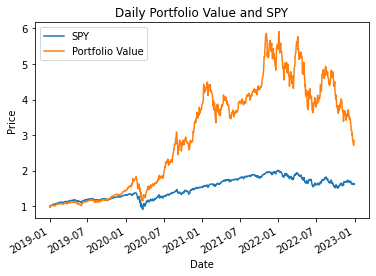

In [120]:
# sharp ratio - risk adjusted return - low risk, high return is better 

sharpe_ratio = (252 ** (0.5)) * ((avg_daily_ret - 0) / ret_std)
print(sharpe_ratio)
ending_value = position_values.iloc[-1]
print('ending_value is {0}'.format(ending_value))

total_returns = avg_daily_ret*(252 / 252)
print('total_returns is {0}'.format(total_returns))

# plot spy

# dfcopynormed = position_values['SPY'] / position_values['SPY'].iloc[0]
ax = normalized_data['SPY'].plot(title = 'Daily Portfolio Value and SPY', label = 'SPY')
# ax = dfcopynormed.plot(title = 'Daily Portfolio Value and SPY', label = 'SPY')

# plot portfolio
data_normed_sum = normalized_data.sum(axis = 1)
data_normed = data_normed_sum/data_normed_sum.iloc[0]
data_normed.plot(label='Portfolio Value', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc = 2)
plt.show()

## Optimizers
* find min values of models
* build parameterized models based on data
* Refine allocations of stocks in portfolio 


x is [2.] y is [0.75]
x is [2.00000001] y is [0.75000001]
x is [0.99999999] y is [0.75000001]
x is [1.5] y is [0.5]
x is [1.50000001] y is [0.5]
Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.5]
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2
Minima found at x = [1.5], y = [0.5]
x is [0.5        0.60526316 0.71052632 0.81578947 0.92105263 1.02631579
 1.13157895 1.23684211 1.34210526 1.44736842 1.55263158 1.65789474
 1.76315789 1.86842105 1.97368421 2.07894737 2.18421053 2.28947368
 2.39473684 2.5       ] y is [1.5        1.30055402 1.1232687  0.96814404 0.83518006 0.72437673
 0.63573407 0.56925208 0.52493075 0.50277008 0.50277008 0.52493075
 0.56925208 0.63573407 0.72437673 0.83518006 0.96814404 1.1232687
 1.30055402 1.5       ]


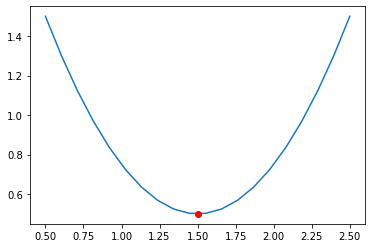

In [162]:
def f(x):
    y = (x-1.5)**2 + 0.5
    print('x is {} y is {}'.format(x,y))
    return y

import scipy.optimize as spo

min_result = None

def test_run():
    Xguess = 2.0
    min_result = spo.minimize(f,Xguess, method='SLSQP',options={'disp':True})
    print('Minima found at x = {}, y = {}'.format(min_result.x, min_result.fun))
    
test_run()

X = np.linspace(0.5,2.5,20)
y = f(X)
plt.plot(X,y)
plt.plot(1.5, 0.5, 'ro')
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 111.00158246728837
            Iterations: 5
            Function evaluations: 19
            Gradient evaluations: 5


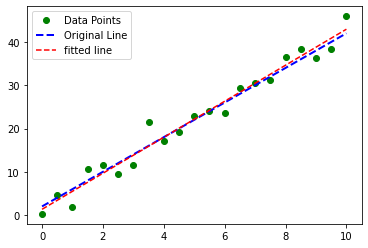

Fitted Line: C0 = 4.196244240379204, C1 = 1.025296339222155
-------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 66946.30341094604
            Iterations: 6
            Function evaluations: 43
            Gradient evaluations: 6


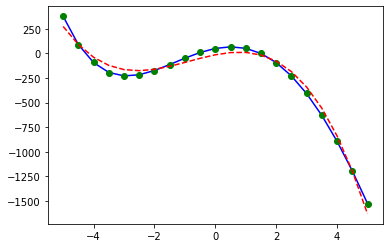

In [280]:
def error(line, data):
    '''
    Compute error between given line and observed data.
    
    Parameters:
    -----------
    line: tuple, list, array - C0 (slope) and C1 is Y-intercept
    data: 2D array
    '''
    error = np.sum((data[:, 1] - (line[0]*data[:,0]+line[1]) )**2)
    return error
 
def get_data():
    
    line_orig = np.float32([4,2]) # slope , intercept
    x_orig = np.linspace(0,10,21)
    y_orig = line_orig[0]*x_orig + line_orig[1]
    
    noise_sigma = 2.0
    noise = np.random.normal(0,noise_sigma, y_orig.shape)
    data = np.asarray([x_orig, y_orig+noise]).T
    
    plt.plot(data[:,0], data[:,1],'go', label = 'Data Points')
    plt.plot(x_orig,y_orig, 'b--', linewidth = 2.0, label = 'Original Line')
    
    return data
   
def fit_line(data, error_func):
    ''' Fit a line to given data, using a supplied error function. 
    Parameters
    ----------
    data: 2D array where each row is a point (X0,Y)
    error: function that computes the error between a line and observed data
    
    Returns a line that minimizes the error function 
    '''
    
    # intial guess for line 
    line = np.float32([0, np.mean(data[:,1])])
        
    # Minimizing error function
    result = spo.minimize(error, line, args = (data,), method = 'SLSQP', options = {'disp': True})
    
    return result.x


def error_poly(C, data):
    '''
    Compute error between given polynomial line and observed data.
    
    Parameters:
    -----------
    C: numpy poly object of polynomial coefficients
    data: 2D array
    '''
    
    # error is sum of square y axis differences
    # error = np.sum((data[:, 1] - np.polyval(C, data[:,0])) **2)
    
    x = data[:, 0]
    y = data[:, 1]    
    error = np.sum((y - np.polyval(C, x)) ** 2 )
    return error

def generate_poly_data(noise_sigma = 3):
    ### Fitting Higher Order Polynomials 
    C_init = np.poly1d(np.array([1, -10, -50, 60, 50], dtype = np.float32))
    x = np.linspace(-5, 5, 21)
    y = np.polyval(C_init,x)
    noise = np.random.normal(0, noise_sigma, y.shape)
    
    data =  np.asarray([x, y+ noise]).T
    return x, y, data
    

def fit_poly(data, error_func, degree=3):
    ''' Fit a line to given data, using a supplied error function. 
    Parameters
    ----------
    data: 2D array where each row is a point (X0,Y)
    error: function that computes the error between a line and observed data
    
    Returns a line that minimizes the error function 
    '''
    
    # intial guess is all coefficients are 1  
    Cguess = np.poly1d(np.ones(degree+1, dtype=np.float32))
        
    # Minimizing error function
    result = spo.minimize(error_poly, Cguess, args = (data,), method = 'SLSQP', options = {'disp': True})
    
    return np.poly1d(result.x)


data = get_data()

fited_line = fit_line(data,error)
plt.plot(data[:,0], fited_line[0] * data[:,0] + fited_line[1], 'r--', label = 'fitted line')
plt.legend(loc = 'upper left')
plt.show()
print ('Fitted Line: C0 = {}, C1 = {}'.format(fitted_line[0], fitted_line[1]))


print('-------')
x, y, data = generate_poly_data()
plt.plot(x, y, 'b-', label = 'Original Line')
plt.plot(data[:,0], data[:,1], 'go', label = 'Data Points')

fitted_poly = fit_poly(data,error_poly)
plt.plot(data[:,0], np.polyval(fitted_poly,data[:,0]), 'r--', label = 'Fitted Line')


In [147]:
# SPY, AAPL, TSLA, WMT, AXP  
np.set_printoptions(precision=10, suppress=True) 
      
returns = np.array([0.000588, 0.001455, 0.002664, 0.000591, 0.000802])
stds = np.array([0.014191, 0.021768, 0.042251, 0.014735, 0.025302])

       
import numpy as np
from scipy.optimize import minimize


# Define the risk-free rate
risk_free_rate = 0.0

# Define the objective function
def objective(weights):
    # print(returns - risk_free_rate)  weights / stds
    return - ((returns - risk_free_rate) / stds) @ weights

# Define the constraints
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
               {'type': 'ineq', 'fun': lambda weights: weights})

# Define the bounds
bounds = [(0, None)] * len(returns)

# Define the initial guess
x0 = np.ones(len(returns)) / len(returns)

# Solve the optimization problem
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Retrieve the optimal weights
optimal_weights = result.x

# Print the optimal weights
print("Optimal Weights:", optimal_weights)

Optimal Weights: [0. 1. 0. 0. 0.]


In [136]:
import numpy as np
from scipy.optimize import minimize

# Define the expected returns and covariance matrix
returns = np.array([0.05, 0.1, 0.15])  # Example expected returns
covariance = np.array([[0.04, 0.02, 0.01],
                       [0.02, 0.09, 0.05],
                       [0.01, 0.05, 0.16]])  # Example covariance matrix

# Define the risk-free rate
risk_free_rate = 0.03

# Define the objective function
def objective(weights):
    return -(returns - risk_free_rate) @ weights / np.sqrt(weights.T @ covariance @ weights)

# Define the constraints
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
               {'type': 'ineq', 'fun': lambda weights: weights})

# Define the bounds
bounds = [(0, None)] * len(returns)

# Define the initial guess
x0 = np.ones(len(returns)) / len(returns)

# Solve the optimization problem
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Retrieve the optimal weights
optimal_weights = result.x

# Print the optimal weights
print("Optimal Weights:", optimal_weights)

Optimal Weights: [0.12306828 0.34804911 0.52888261]


In [137]:
import numpy as np
from scipy.optimize import minimize

# Define the expected returns and covariance matrix
returns = np.array([0.05, 0.1, 0.15])  # Example expected returns
covariance = np.array([[0.04, 0.02, 0.01],
                       [0.02, 0.09, 0.05],
                       [0.01, 0.05, 0.16]])  # Example covariance matrix

# Define the risk-free rate
risk_free_rate = 0.03

# Define the objective function
def objective(weights):
    return -(returns - risk_free_rate) @ weights / np.sqrt(weights.T @ covariance @ weights)

# Define the constraints
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
               {'type': 'ineq', 'fun': lambda weights: weights})

# Define the bounds
bounds = [(0, None)] * len(returns)

# Define the initial guess
x0 = np.ones(len(returns)) / len(returns)

# Solve the optimization problem
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Retrieve the optimal weights
optimal_weights = result.x

# Print the optimal weights
print("Optimal Weights:", optimal_weights)

Optimal Weights: [0.12306828 0.34804911 0.52888261]


In [140]:
weights = np.ones(len(returns)) / len(returns)

In [143]:
returns @ weights

0.1